# Bike sharing

London has always been a forward-thinking, energetic and admirable city. As a giant in urban mobility, a cutting-edge public transportation network quickly developed. Nonetheless, despite having a cutting-edge public transportation system, the British capital continues to rank among the most congested cities in the world. As a result, London has been one of the project's first destinations for the international shared bicycle project.

The dataset London Bike Sharing is a collection of historical data that contains detail information about how the city of London's bike sharing system is used. It is the perfect tool for modeling and analyzing the demand for bike sharing in cities as we as for identifiying usage patterns and trends as it contains the following information:

    - Data on bicycle usage hours for each london bicycle station from January 2015 to January 2017.
    - The start and end times of each trip, how long it took, where it startes and ended, as well as the temperature, humidity, and climatic conditions at the time.
    
By examining each potential meteorological component, this dataset seeks to create a model that forecasts the demand for shared bikes in the city of London in the future concerning weather conditions where we may learn about the variables affecting bicycle reservation, alongside the connecction between the season, the weather and the workday.

### Metadata:

1. metadata
    - "timestamp" - timestamp field for grouping the data
    - "cnt" - the count of a new bike shares or bookings 
    - "t1" - real temperature in C
    - "t2" - temperature in C "feels like"
    - "hum" - humidity in percentage
    - "wind_speed" - wind speed in km/h
    - "weather_code" - category of the weather
    - "is_holiday" - boolean field - 1 holiday / 0 non holiday
    - "is_weekend" - boolean field - 1 if the day is weekend
    - "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    
     "weather_code" category description:
    1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog


In [1]:
# We import all the libraries that we need in our analysis and we will import others as we need them.
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset:
bikes_0 = pd.read_csv('london_merged.csv')

The first five rows are shown here, along with the 10 total columns that make up our dataset.

Moreover, we may observe that the number of columns that comprise our dataset includes numerical variables. Even though some of them appear to be number, they are categorical by nature, that is the case with "weather_code", "is_holiday", "is_weekend", "season".

In [3]:
# Look at the top of the dataset:
bikes_0.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
bikes_0.shape

(17414, 10)

Prior to beginning our analysis, it would be beneficial to provide meaningful terms for the "season" and "weather_code" codes because they are represented by numerical values and as we mentioned before they are categorical by nature.

In [5]:
# Changing the name of the variables and converting them in categorical
bikes_0['season'] = bikes_0['season'].map({0:'spring', 1:'summer', 2:'fall', 3:'winter'})
bikes_0['weather'] = bikes_0['weather_code'].map({1:'clear', 2:'scattered clouds', 3:'Broken clouds', 4:'Cloudy', 7:'Light rain', 10:'rain with thunderstorm',26:'snowfall',94:'Freezing Fog'})

bikes_0 = bikes_0.drop(['weather_code'], axis=1)

In [6]:
# Look at the last of the dataset:
bikes_0.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season,weather
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,0.0,0.0,winter,Broken clouds
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,0.0,0.0,winter,Cloudy
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,0.0,0.0,winter,Cloudy
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,0.0,0.0,winter,Cloudy
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,0.0,0.0,winter,scattered clouds


We can get our dataset's descriptive statistics using this function. This function returns a list of all the dataset's column statistics. 
It is helpful for discovering outliers or missing data as well for having a broad understanding of the data beaing worked on.
For this dataset, we will only analyze the numerical variables and the next summary show us the number of non-null values, the mean, the standar deviation, the minimum and maximun values and the percentiles 25%, 50% and 75%.

    1- The table tells us that we have a total of 17414 rows.
    2- It provide us with the mean value, which helps us to understand our data in general and contrast it with other data sets. However, in our data collection, outliers or extremes may have an impact on the mean.
    3- It give us the standar deviation which is a measuyre of dispersion used to characterize the variability or spread of a data collection. As we can observe we have a high value in the column "cnt" which it denotes a more dispersed distribution of values compared to the other column "is_holiday" where we find a low std that indicates a more concentrated distribution of values.
    4- It provide us the minimun value where we can notice we have already atypical values in the column "cnt"
    5- The percentiles 25th, 50th, 75th values are visible which are some statistical techniques divide an ordered piece of data into 100 equal parts that we found as the 25%, 50% and 75% which represent the values of the data set.
    6- we also have the maximun which indicates de maximum value in our data 

In [7]:
# Find some summary statistics:
bikes_0.describe()

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,0.022051,0.285403
std,1085.108068,5.571818,6.615145,14.313186,7.894570,0.146854,0.451619
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,0.000000,0.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,0.000000,1.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,1.000000,1.000000


Here we will see that we have categorical and numerical columns however for this analysis we will proceed to convert the column "timestamp" in datatime and we will have now categorical, numerical and datatime variables

In [8]:
# Convert the catergorical variable named timestamp to date time using the library Pandas

bikes_0 ['timestamp'] = pd.to_datetime(bikes_0['timestamp'])

In [9]:
# As we can see the data from the variable timestamp has been changed to date time
bikes_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   timestamp   17414 non-null  datetime64[ns]
 1   cnt         17414 non-null  int64         
 2   t1          17414 non-null  float64       
 3   t2          17414 non-null  float64       
 4   hum         17414 non-null  float64       
 5   wind_speed  17414 non-null  float64       
 6   is_holiday  17414 non-null  float64       
 7   is_weekend  17414 non-null  float64       
 8   season      17414 non-null  object        
 9   weather     17414 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 1.3+ MB


Now all th columns look excellent and it seems there are no missing values. Let's examine specifics statistics as mean, median, mode, coefficient of variation and the frequency of each unique value from the column "cnt".

    - Mean would be the average of the total number of bicycles rented over all days in the dataframe.
    - Median would be the value that divides the data set into two equal parts.
    - Mode would be useful to find patrons in the data. For instance if the value of the column "cnt" is high, this may indicate that there are particular days when many bikes are rented. On the other hand if the mode is a lower value this may indicate that there aren't many days when many bikes are available for rental.
    - Coefficient of variation exhibits high relative variability therefore this suggests that there is a wide range of values in the column and a lot of variation in the data which may indicate that there are factors that are difficult to predict that would have an impact an the number of rented bicycles.
    - Frequency may be helpful in analyzing the specific values in the column and better understanding how the data are distributed in this column.

In [10]:
bikes_0.isnull().sum()

timestamp     0
cnt           0
t1            0
t2            0
hum           0
wind_speed    0
is_holiday    0
is_weekend    0
season        0
weather       0
dtype: int64

In [11]:
bikes_0["cnt"].value_counts()

46      46
53      39
33      36
70      36
120     36
        ..
3022     1
3112     1
1338     1
3270     1
2220     1
Name: cnt, Length: 3781, dtype: int64

In [12]:
# Finding the mean:
mean_cnt = bikes_0['cnt'].mean()
print(round(mean_cnt, 2))

1143.1


In [13]:
# Finding the median:
median = bikes_0['cnt'].median()
print(median)

844.0


In [14]:
# Finding the mode
mode = bikes_0['cnt'].mode()
print(mode)

0    46
Name: cnt, dtype: int64


In [15]:
# Finding the coefficient of variation

cv = np.std(bikes_0['cnt']) / np.mean(bikes_0['cnt']) * 100
print("The coefficient of variation is:", cv)

The coefficient of variation is: 94.92392199294784


In [16]:
bikes_0.describe()

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,0.022051,0.285403
std,1085.108068,5.571818,6.615145,14.313186,7.894570,0.146854,0.451619
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,0.000000,0.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,0.000000,1.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,1.000000,1.000000


# Analysis

Commencing with the analysis, we discover that the average number of trips per hour is 844. The perceived temperature is 11,5°C (t2), although the real average temperature is 12°C (t1). The average number of cyclist per hour is 1143 thile the maximun number is 7860, therefore there are indications of outliers.
Additionally it is possible to see in the following boxplot that there are outliers, which appear after 4000 journeys per hour.

Text(0.5, 1.0, 'Bookings')

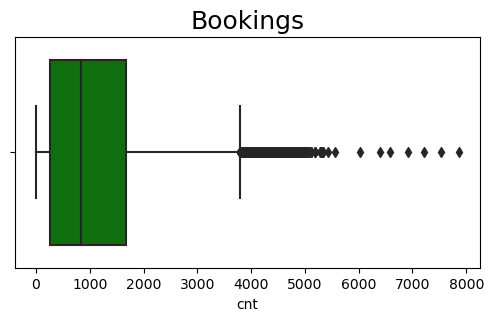

In [17]:
# we are graphing the variable the count of a new bike shares. 
fig = plt.figure(figsize=(6, 3))

sns.boxplot(x ='cnt',
             data=bikes_0, orient='h', color='green') 
plt.title('Bookings',
           fontsize=18)



# Season vs Bookings

We can observe from the bar chart that there is a little bike sharing during the winter time and this continues during snowfall. However while the seasons are changing and the climate is getting less cold the number of people who seem to use the bicycles is increassing as we can see when the sky is clear or has only a few sparse clouds, bike sharing is more prevalent. Also when it is not reaining or snowing and during the summer people frequently share more bikes.

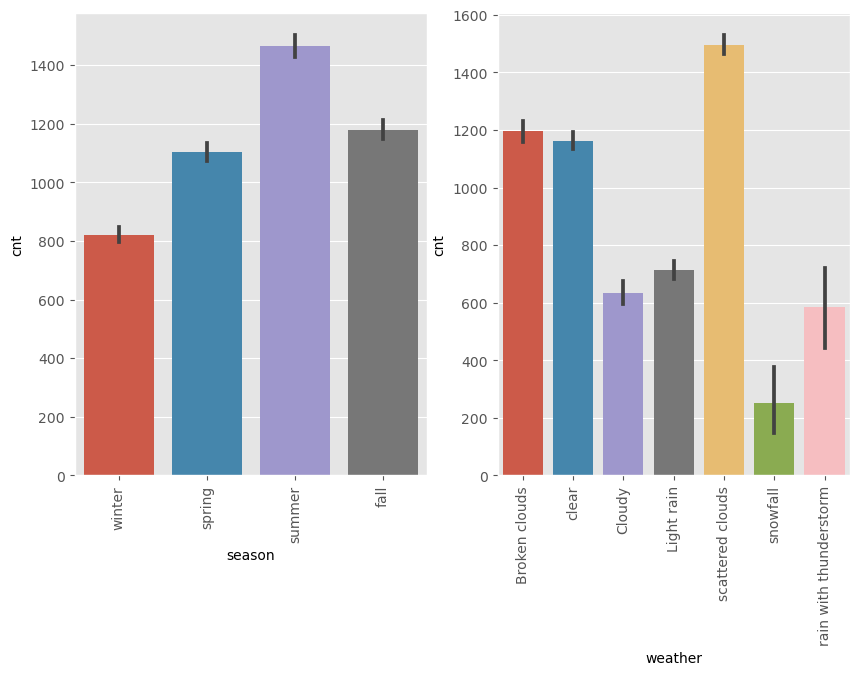

In [18]:
plt.style.use('ggplot')
fig, axs = plt.subplots(1, 2, figsize=(10,6))

cols = ['season', 'weather']
for i in range(len(cols)):
    sns.barplot(x=cols[i], y='cnt', data=bikes_0, ax=axs[i])
    axs[i].xaxis.set_tick_params(rotation=90)
    

# Holiday and Weekend vs Bookings

It is interesting to see that on weekends and holidays, bike sharing is significantly lower. It appears that the majority of bike sharing is used throughout the week, possibly by people who go to work every day.

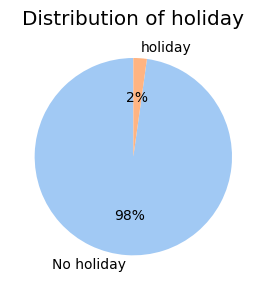

In [19]:
# 0 = non holiday
# 1 = holiday

count = bikes_0['is_holiday'].value_counts()
labels = ['No holiday', 'holiday']

fig, ax = plt.subplots(figsize=(3, 3))
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette("pastel"));
plt.title('Distribution of holiday');

plt.tight_layout()

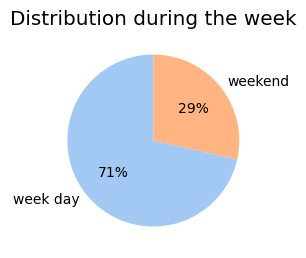

In [20]:
# 0 = week day
# 1 = weekend

count = bikes_0['is_weekend'].value_counts()
labels = ['week day', 'weekend']

fig, ax = plt.subplots(figsize=(3, 3))
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette("pastel"));
plt.title('Distribution during the week');

plt.tight_layout()

# Meteorological variables

It is clear that bike sharing grows when the temperature rises and bike sharing declines as the humidity rises therefore we would say the ideal wind speed for bicycling appears to be in the range of 20-40 km/hr. Additionally when the temperature is upward 20 degrees people feel more at ease traveling in temperate climates, as a result the bike sharing is increasing.
The tables and the boxplots show us that in each variable we have outliers that indicates that it is necessary to perform a preprocessing step to remove them before developing prediction models. 

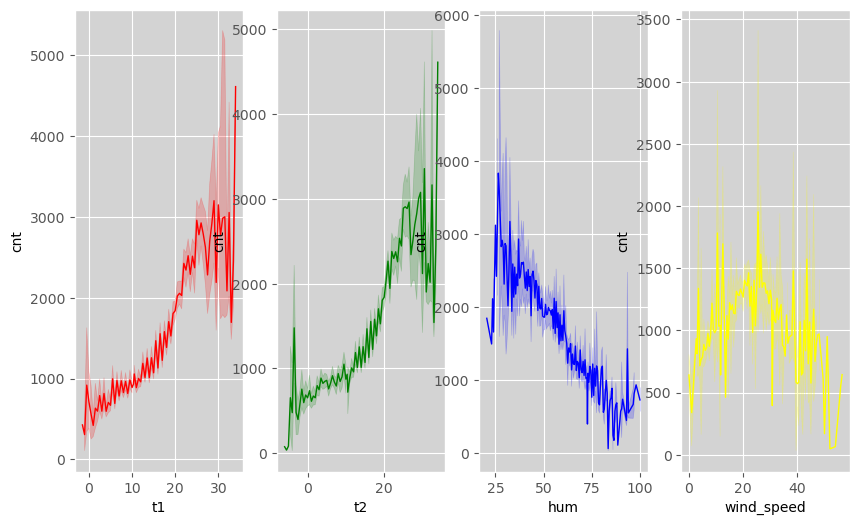

In [21]:

num_cols = ['t1', 't2', 'hum', 'wind_speed']
fig, axs = plt.subplots(1, 4, figsize=(10,6))

colors = ['red', 'green', 'blue', 'yellow']
palette = sns.color_palette('pastel', n_colors=3)
facecolor = 'lightgrey'

i = 0
for col in num_cols:
    sns.lineplot(x=col, y='cnt', data=bikes_0, ax=axs[i], color=colors[i], linewidth=1)
    axs[i].set_facecolor(facecolor)
    
    i += 1

In [22]:
bikes_0['t1'].describe()

count    17414.000000
mean        12.468091
std          5.571818
min         -1.500000
25%          8.000000
50%         12.500000
75%         16.000000
max         34.000000
Name: t1, dtype: float64

In [23]:
bikes_0['t2'].describe()

count    17414.000000
mean        11.520836
std          6.615145
min         -6.000000
25%          6.000000
50%         12.500000
75%         16.000000
max         34.000000
Name: t2, dtype: float64

In [24]:
bikes_0['hum'].describe()

count    17414.000000
mean        72.324954
std         14.313186
min         20.500000
25%         63.000000
50%         74.500000
75%         83.000000
max        100.000000
Name: hum, dtype: float64

In [25]:
bikes_0['wind_speed'].describe()

count    17414.000000
mean        15.913063
std          7.894570
min          0.000000
25%         10.000000
50%         15.000000
75%         20.500000
max         56.500000
Name: wind_speed, dtype: float64

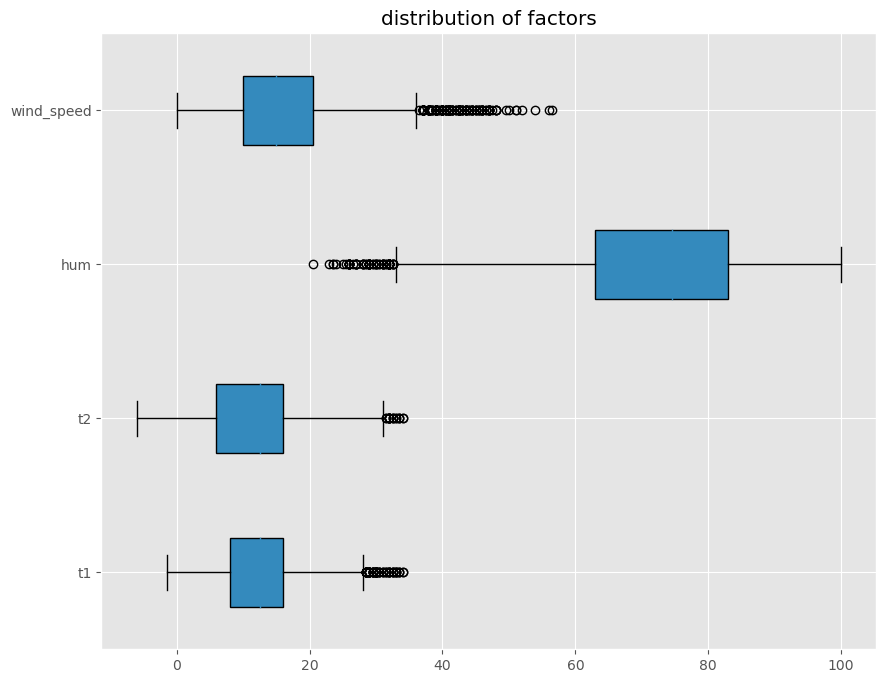

In [26]:
fig = plt.figure(figsize=(10, 8))
plt.boxplot ([bikes_0['t1'], bikes_0['t2'], bikes_0['hum'], bikes_0['wind_speed']], vert=False, patch_artist=True, labels=["t1", "t2", "hum", "wind_speed"])
plt.title ("distribution of factors")

plt.show()

# Trends by date

First of all we will split the variable timestamp in year, month, hour to analyze the different distributions. 
As we can see it is noteworthy that between 2015 and 2016 the frequency that people who were using the bike sharing is similar compared with the year 2017 which actually we have just 3 records to analyze it.

In [27]:
bikes_0.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season,weather
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,winter,Broken clouds
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,winter,clear
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,winter,clear
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,winter,clear
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,winter,clear


In [28]:
bikes_0['year'] = bikes_0['timestamp'].dt.year
bikes_0['month'] = bikes_0['timestamp'].dt.month
bikes_0['hour'] = bikes_0['timestamp'].dt.hour
bikes_0.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season,weather,year,month,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,winter,Broken clouds,2015,1,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,winter,clear,2015,1,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,winter,clear,2015,1,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,winter,clear,2015,1,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,winter,clear,2015,1,4


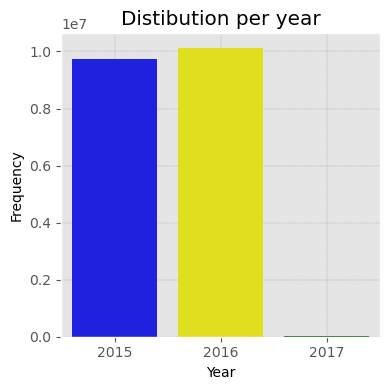

In [29]:
df_year = bikes_0.groupby('year').sum(numeric_only=True)

fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(data=df_year.reset_index(), x='year', y='cnt', palette=['blue', 'yellow', 'green'])
ax.set_xlabel('Year')
ax.set_ylabel('Frequency')
plt.title('Distibution per year')

ax.grid(True, linestyle='--', linewidth=0.2, color='gray')
plt.tight_layout()

Bicycle trips tend to be less frequent between November and February due to the winter season at this time of year, this could be because the people who are using bike sharing would prefer to use public transport because the weather and that period is colder rather during summer time.

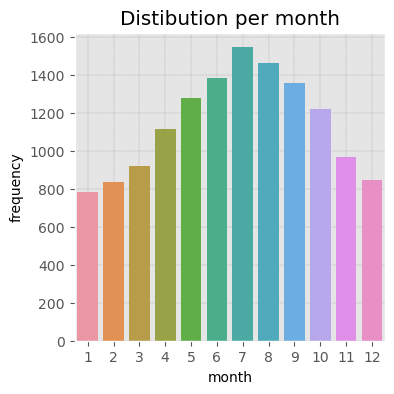

In [30]:
df_month = bikes_0.groupby('month').mean(numeric_only=True)

fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(data=df_month.reset_index(), x='month', y='cnt')
ax.set_xlabel('month')
ax.set_ylabel('frequency')
plt.title('Distibution per month')
ax.grid(True, linestyle='--', linewidth=0.2, color='gray')


The peak travel times correspond to 8am and 6pm, that indicates that the users are using the bike sharing to go to their workplace when they enter and leave. Travel is frequently done in the morning and evening. Fewer people travel late at night. Also we can say that the bike sharing is lower between 9am and 4pm that it is more the individuals who are using the service are young people or people who is not working and between 11pm and 5am Due to the fact that it is very late in the day, it is not being used very frequently.

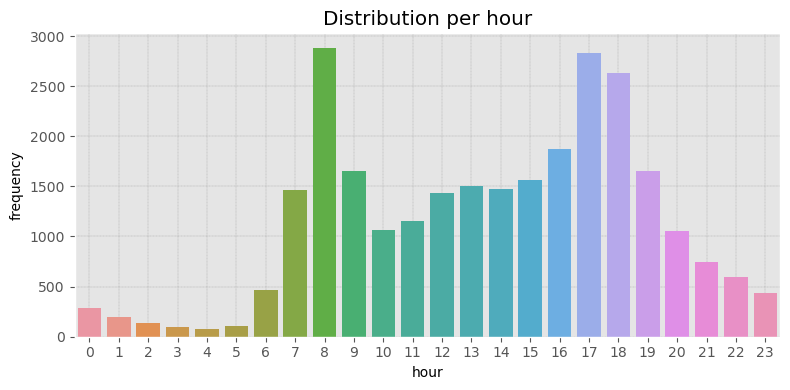

In [31]:
df_hour = bikes_0.groupby('hour').mean(numeric_only=True)

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df_hour.reset_index(), x='hour', y='cnt')
ax.set_xlabel('hour')
ax.set_ylabel('frequency')
plt.title('Distribution per hour')
ax.grid(True, linestyle='--', linewidth=0.2, color='gray')
plt.tight_layout()

Overal the tendency for travel due to meteorological conditions is the same in all regions.
There are more bookings when there is no rain and the sky is not completely dark than under other circunstances, this coul be because the people feel more comfortable commuting on dry streets where they wont be in risk to falling off their bicycle.

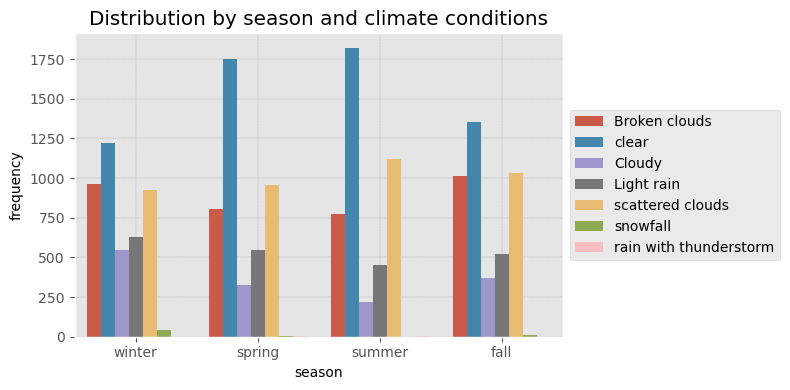

In [32]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(data=bikes_0, x='season', hue='weather',)
plt.title('Distribution by season and climate conditions')
ax.set_xlabel('season')
ax.set_ylabel('frequency')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True, linestyle='--', linewidth=0.2, color='gray')
plt.tight_layout()

# Distribution by Temperature, Humidity and Wind speed

    - We can see the distribution of both temperature is uniform.
    - When the humidity is low, travel volume somewhat increases.
    - When there is a strong wind, there are fewer bicycle trips made.

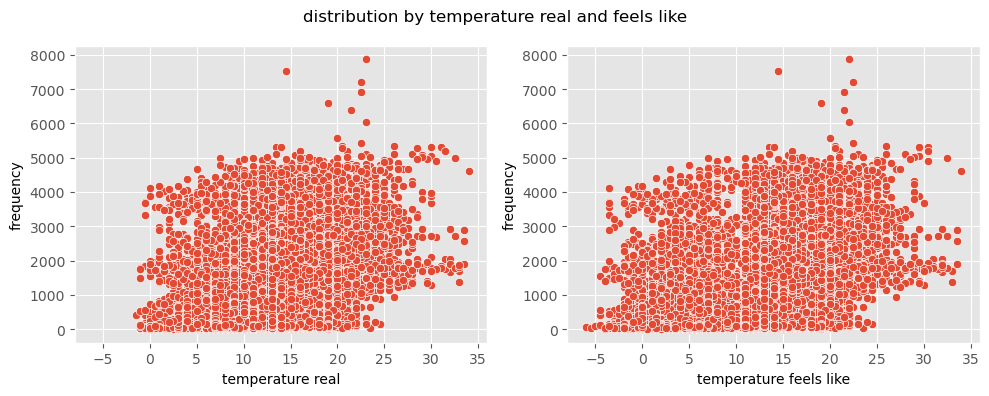

In [33]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

sns.scatterplot(data=bikes_0, x='t1', y='cnt', ax=ax[0])
ax[0].set_xlabel('temperature real')
ax[0].set_ylabel('frequency')

sns.scatterplot(data=bikes_0, x='t2', y='cnt', ax=ax[1])
ax[1].set_xlabel('temperature feels like')
ax[1].set_ylabel('frequency')

fig.suptitle('distribution by temperature real and feels like')

plt.tight_layout()

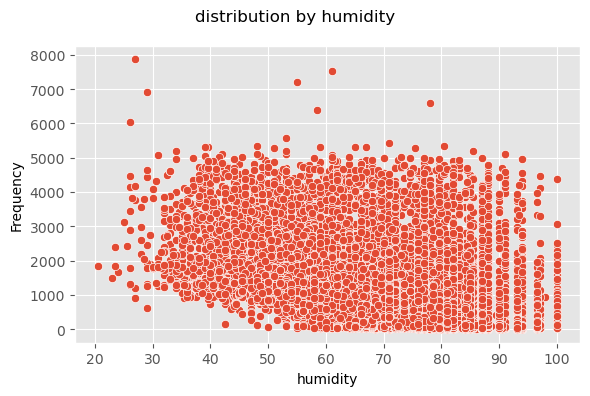

In [34]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(data=bikes_0, x='hum', y='cnt')
ax.set_xlabel('humidity')
ax.set_ylabel('Frequency')
fig.suptitle('distribution by humidity')

plt.tight_layout()

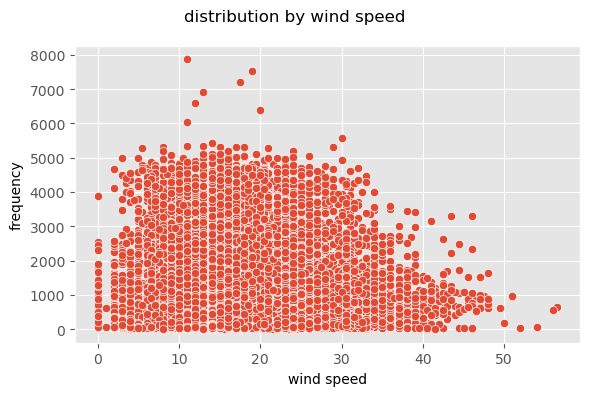

In [35]:

fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(data=bikes_0, x='wind_speed', y='cnt')
ax.set_xlabel('wind speed')
ax.set_ylabel('frequency')
fig.suptitle('distribution by wind speed')

plt.tight_layout()

# Variable correlation

    -Bycicle trips have a strong positive correlation with perceived and actual temperature, followed by time.
    -Bycicle trips have a strong negative correlation with relative humidity

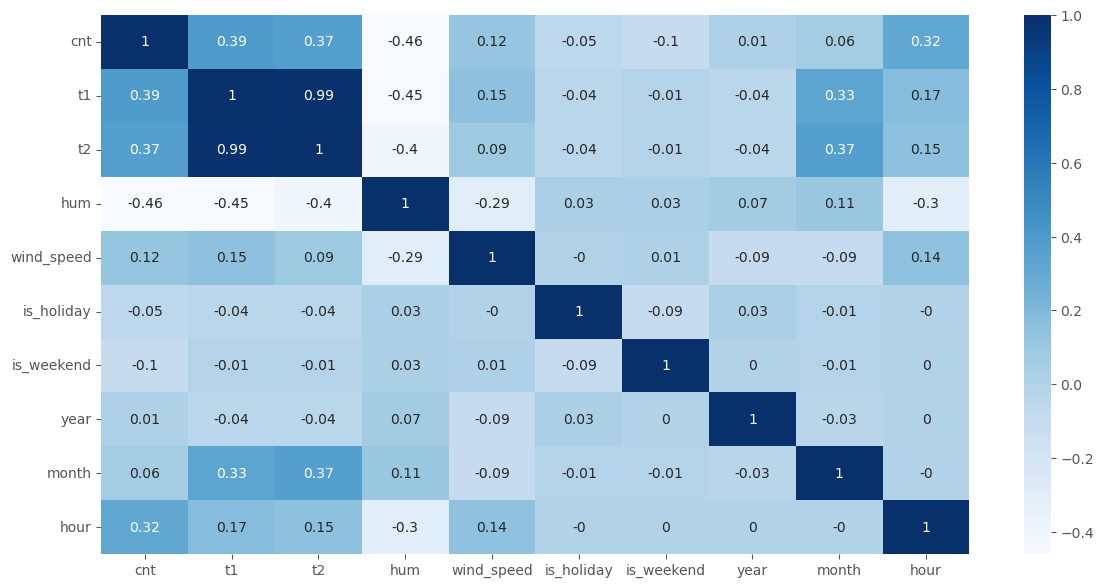

In [36]:
correlation = bikes_0.corr(numeric_only=True).round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'Blues');

# Conclusion

Bicycle sharing are an easy and quick way to get from one place to another, but people must make reservations in advance depending on the weather and season because the vast majority of users tend to use them when the days are clear and there is little chance of strong winds, or in the case of warmer seasons like spring and summer when the days are longer and sunnier.However, it is advised to offer a discount on travel or even free transportation in order to improve the availability of bicycles during times of unfavourable meteorological conditions.
On the other hand the service It is recommended to create a coupon that encourages users to give preference to use on certain days because the service has more reservations when it is midweek days than when it is weekend days or holidays. 




## Reference

www.kaggle.com. (n.d.). London bike sharing dataset. [online] Available at: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset.
‌

www.tutorialspoint.com. (n.d.). Seaborn.histplot() method. [online] Available at: https://m.tutorialspoint.com/seaborn/seaborn_histplot_method.htm [Accessed 13 Apr. 2023].
‌

pandas.pydata.org. (n.d.). pandas.to_datetime — pandas 1.3.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html.
‌

W3Schools (2019). Python Tutorial. [online] W3schools.com. Available at: https://www.w3schools.com/python/default.asp.
‌

# TASK 2 Probability (Discrete):

Stating the answers alone here is not sufficient - you should show clearly how you found your answer, justify any decisions made, and include plots where appropriate.


● What is the probability of rolling exactly two 6s in five rolls of a fair die?

We can use the binominal distribution formula:
 P(X=k)=(n choose k)*p'k*(1-p)'(n-k)
 
 where:
 
 - P(X=k) is the probability of getting exactly k successes in n
 - n is the number of trial
 - k is the number os successes
 - p is the probability of success on each trial
 
In this case n=5, k=2 and p=1/6. 

In [37]:
# Calculate binomial probability P(X = 2) when X ~ Binom(n = 5, p = 1/6)
from scipy.stats import binom
binom.pmf(k=2, n=5, p=1/6)

0.16075102880658423

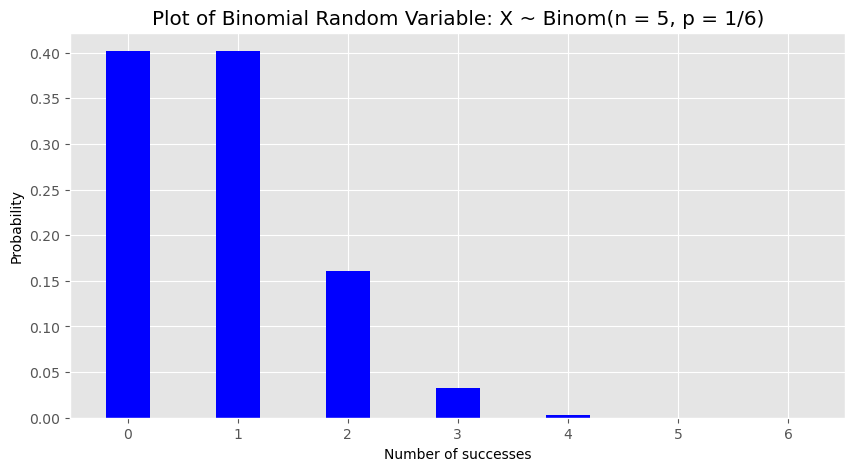

In [63]:
# Printing all probabilities:
x = np.array([0, 1, 2, 3, 4, 5, 6])
out1 = binom.pmf(k=x, n=5, p=1/6)
out1

# Creating a plot:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))

# Creating the bar plot
plt.bar(x, out1, color ='b', width = 0.4)

plt.xlabel("Number of successes")
plt.ylabel("Probability")
plt.title("Plot of Binomial Random Variable: X ~ Binom(n = 5, p = 1/6)")
plt.show()

● The number of industrial injuries on average per working week in a factory is 0.75. Assuming that
the distribution of injuries follows a Poisson distribution, find the probability that in a particular
week there will be no more than two accidents.

To find the probability that there will be no more than two accidents in a particular week, we need
to calculate:
We will use the formula of Poisson Distribution 

P(X=k) = (e^(-λ) * λ^k) / k!

- P(x=0) + P(x=1) + P(x=2)
- P(x=0) = (e^-0.75 * 0.75^0) / 0! = 0.4724
- P(x=1) = (e^-0.75 * 0.75^1) / 1! = 0.3543
- P(x=2) = (e^-0.75 * 0.75^2) / 2! = 0.1329

Therefore, the probability that there will be no more than two accidents in a particular week is:
25
- P(x<=2) = P(x=0) + P(x=1) + P(x=2) = 0.4724 + 0.3543 + 0.1329 = 0.9596.
So, there is a 95.96% chance that there will be no more than two accidents in a particular week.

In [39]:
from scipy.stats import poisson
poisson.cdf(k=2, mu=0.75)

0.9594945602551861

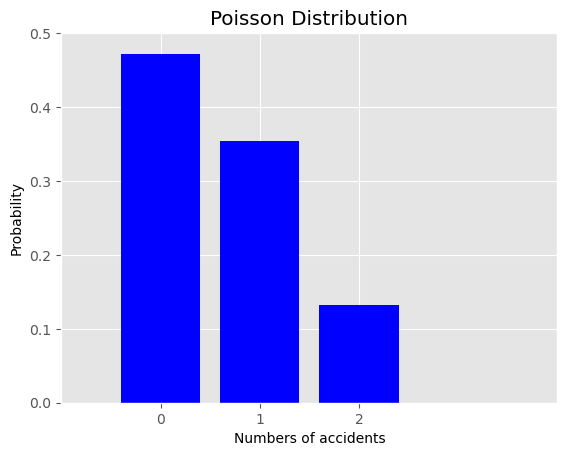

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

mu = 0.75
k = 2

# Create an array with the values of x
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))

# Calculate the PMF of Poisson at all values of x
pmf = poisson.pmf(x, mu)

# Calculate the CDF of Poisson at k=2
cdf = poisson.cdf(k, mu)

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the Poisson distribution as a bar plot
ax.bar(x, pmf, color='b')

# Adjust the limits of the axes
ax.set_xlim([-1, 4])
ax.set_ylim([0, 0.5])

# Adjust the labels of the axes
ax.set_xticks(x)
ax.set_xlabel('Numbers of accidents')
ax.set_ylabel('Probability')
ax.set_title('Poisson Distribution')

plt.show()

# TASK 3 - Probability (Continuous):

Stating the answers alone here is not sufficient - you should show clearly how you found your answer, justify
any decisions made, and include plots where appropriate.



The time a person spends at Dublin Zoo is Normally distributed with a mean of 90 minutes and a
standard deviation of 10 minutes.

Using this distribution, answer the following:

● If a visitor is selected at random, find the probability that they will spend at most 85 minutes visiting
the zoo.



For this sample we will standardize the random variable X that represents the time a visitor spends at the zoo as follows:

Z = (X - a) / b

Where a is the mean of the distribution and b is the standard deviation of the distribution. This formula is the one which we will use in the exercises

In [95]:
from scipy.stats import norm

mean = 90
std = 10
time = 85

# Normalize the time
z = (time - mean) / std

# find the probability using the cumulative distribution function (CDF)
prob = norm.cdf(z)

print(f"The probability that a visitor has spent is more than 85 minutes is: {prob:.2%}")

The probability that a visitor has spent is more than 85 minutes is: 30.85%


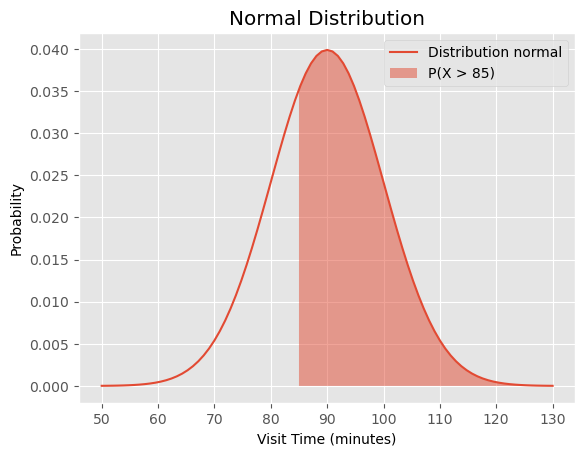

In [110]:
mean = 90
std = 10

# calculate probability P(X > 100)
x = np.linspace(mean - 4*std, mean + 4*std, 85)
y = norm.pdf(x, mean, std)
z = (85 - mean) / std
prob = norm.cdf(z)

plt.plot(x, y, label='Distribution normal')

px = np.linspace(85, mean + 4*std, 85)
py = norm.pdf(px, mean, std)
plt.fill_between(px, py, alpha=0.5, label='P(X > 85)')

plt.title('Normal Distribution')
plt.xlabel('Visit Time (minutes)')
plt.ylabel('Probability')
plt.legend()

plt.show()

● If a visitor is selected at random, find the probability that they will spend at least 100 minutes
visiting the zoo.

To find the probability that a visitor spends at least 100 minutes visiting the zoo, we need to find the probability that a visitor spends less than 100 minutes visiting the zoo, and then subtract that value from 1.

The normal distribution is the probability distribution used to model the time a visitor spends at the zoo. In this case, the mean is 90 minutes and the standard deviation is 10 minutes.

We can use a standard normal distribution table to find the probability that a visitor will spend less than 100 minutes visiting the zoo. First, we need to calculate the z-score:

- z = (100 - 90) / 10 = 1

Next, we look at the standard normal distribution table to find the probability that a z-score is less than 1. From the table, we find the probability to be 0.8413.

Finally, we subtract this value from 1 to find the probability that a visitor spends at least 100 minutes visiting the zoo:

- 1 - 0.8413 = 0.1587

Therefore, the probability that a visitor spends at least 100 minutes visiting the zoo is 15.87%.

In [106]:
from scipy.stats import norm

mean = 90
std = 10
time = 100

# Normalize the time
z = (time - mean) / std

# find the probability using the cumulative distribution function (CDF)
prob = 1 - norm.cdf(z)

print(f"The probability that a visitor has spent at least 100 minutes is: {prob:.2%}")

The probability that a visitor has spent at least 100 minutes is: 15.87%


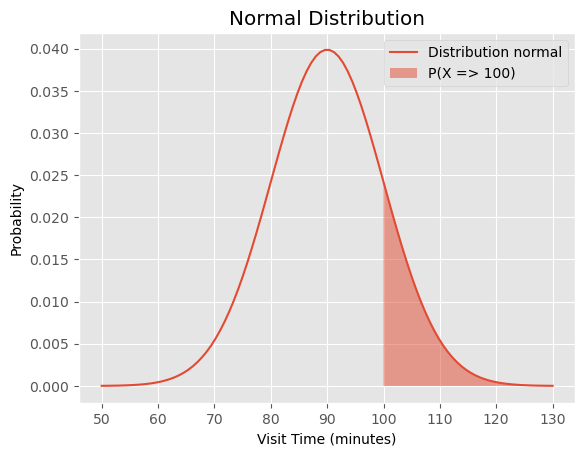

In [102]:
mu = 90
sigma = 10

# calculate probability P(X > 100)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = norm.pdf(x, mu, sigma)
z = (100 - mu) / sigma
prob = 1 - norm.cdf(z)

plt.plot(x, y, label='Distribution normal')

px = np.linspace(100, mu + 4*sigma, 100)
py = norm.pdf(px, mu, sigma)
plt.fill_between(px, py, alpha=0.5, label='P(X => 100)')

plt.title('Normal Distribution')
plt.xlabel('Visit Time (minutes)')
plt.ylabel('Probability')
plt.legend()

plt.show()


● Given that you know that a particular visitor has spent longer than average visiting the Zoo, what is
the probability that they have spent more than 100 minutes there?

To calculate the probability that a visitor will spend more than 100 minutes at Dublin Zoo, given that they spend more time than average, we need to use conditional probability, we need to calculate the probability that a visitor will spend more than 100 minutes given that they spend more than 90 minutes, which can be written as:

• P(X > 100 | X > 90)

where X is the time a visitor spends at Dublin Zoo.

Using the properties of conditional probability, we can simplify this expression as follows:

• P(X > 100 | X > 90) = P(X > 100 and X > 90) / P(X > 90)

In [120]:
import numpy as np

# Define the mean and standard deviation of the distribution
mean = 90
std = 10

# Define the minimum times spent for each conditional probability
time_1 = 90
time_2 = 100

# a x greater than 90
# b x greater than 100 and greater than 90
# c x greater than 100 given, greater than 90

# Calculate the probabilities using the cumulative distribution function
a = 1 - norm.cdf(min_time_1, loc=mean, scale=std_dev)
b = 1 - norm.cdf(min_time_2, loc=mean, scale=std_dev)

# Calculate the conditional probability 
c = b / a

# Print the result
print("The probability that a visitor will spend more than 100 minutes at Dublin Zoo, given that they spend more than 90 minutes is:", c)

The probability that a visitor will spend more than 100 minutes at Dublin Zoo, given that they spend more than 90 minutes is: 0.31731050786291415


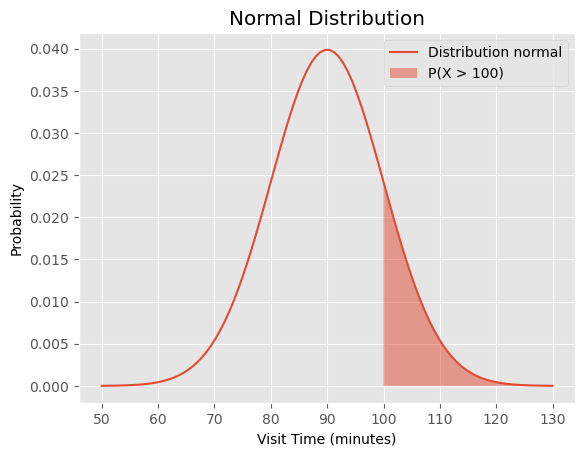

In [109]:
mu = 90
sigma = 10

# calculate probability P(X > 100)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = norm.pdf(x, mu, sigma)
z = (100 - mu) / sigma
prob = norm.cdf(z)

plt.plot(x, y, label='Distribution normal')

px = np.linspace(100, mu + 4*sigma, 100)
py = norm.pdf(px, mu, sigma)
plt.fill_between(px, py, alpha=0.5, label='P(X > 100)')

plt.title('Normal Distribution')
plt.xlabel('Visit Time (minutes)')
plt.ylabel('Probability')
plt.legend()

plt.show()